# Lung Cancer Prediction Project

## Loading and Exploring the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("..\Datasets\lung_cancer.csv")

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


So we can see our various features and our target variable which is the column **'LUNG_CANCER'**

In [4]:
print("Shape of data: ", data.shape)

Shape of data:  (309, 16)


We can see that the dataset contains 309 rows and 16 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Datatype Conversion
We can see that the LUNG_CANCER column is an object data type so we'll convert the data into numerical data type by converting **YES to 1** and **NO to 0**.

We will also convert the other columns to numerical data types between 1 and 0 to help us when we're building the model.

In [6]:
data.loc[data['GENDER']=='M','GENDER'] = 1
data.loc[data['GENDER']=='F','GENDER'] = 0
data['GENDER'] = data['GENDER'].astype('int')
data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
data.loc[data['LUNG_CANCER']=='YES','LUNG_CANCER'] = 1
data.loc[data['LUNG_CANCER']=='NO','LUNG_CANCER'] = 0
data['LUNG_CANCER'] = data['LUNG_CANCER'].astype('int')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


We have now changed the Gender and Lung_cancer columns to numerical values 1 and 0 where Male and having lung_cancer = 1 and Female and Not having Lung_Cancer = 0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [9]:
data["SMOKING"].replace({2: 1, 1: 0}, inplace=True)
data["YELLOW_FINGERS"].replace({2: 1, 1: 0}, inplace=True)
data["ANXIETY"].replace({2: 1, 1: 0}, inplace=True)
data["PEER_PRESSURE"].replace({2: 1, 1: 0}, inplace=True)
data["CHRONIC DISEASE"].replace({2: 1, 1: 0}, inplace=True)
data["FATIGUE "].replace({2: 1, 1: 0}, inplace=True)
data["ALLERGY "].replace({2: 1, 1: 0}, inplace=True)
data["WHEEZING"].replace({2: 1, 1: 0}, inplace=True)
data["ALCOHOL CONSUMING"].replace({2: 1, 1: 0}, inplace=True)
data["COUGHING"].replace({2: 1, 1: 0}, inplace=True)
data["SHORTNESS OF BREATH"].replace({2: 1, 1: 0}, inplace=True)
data["SWALLOWING DIFFICULTY"].replace({2: 1, 1: 0}, inplace=True)
data["CHEST PAIN"].replace({2: 1, 1: 0}, inplace=True)

In [10]:
data.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
254,1,74,0,1,0,0,1,1,1,1,1,1,1,0,1,1
93,0,59,0,1,1,1,1,0,1,1,1,1,1,1,0,1
134,1,71,1,1,1,0,1,0,1,1,1,1,0,1,1,1
289,0,61,1,0,0,0,1,1,1,0,0,0,1,0,0,1
270,0,70,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [11]:
data.rename(columns={"CHRONIC DISEASE": "CHRONIC_DISEASE",
                   "ALCOHOL CONSUMING": 'ALCOHOL_CONSUMPTION',
                    "SHORTNESS OF BREATH": "SHORTNESS_OF_BREATH",
                    "CHEST PAIN":"CHEST_PAIN",
                    "SWALLOWING DIFFICULTY": "SWALLOWING_DIFFICULTY"},
          inplace=True, errors='raise')

In [12]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [13]:
data.to_csv("processed_lung_cancer.csv")

We will also rename some columns so as to remove the white space in them

We have now converted the variables from "2" and "1" to "1" and "0".

In [14]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMPTION      0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

We can see that the data does not contain any missing values.

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,0.563107,0.496806,0.0,0.0,1.0,1.0,1.0
YELLOW_FINGERS,309.0,0.569579,0.495938,0.0,0.0,1.0,1.0,1.0
ANXIETY,309.0,0.498382,0.500808,0.0,0.0,0.0,1.0,1.0
PEER_PRESSURE,309.0,0.501618,0.500808,0.0,0.0,1.0,1.0,1.0
CHRONIC_DISEASE,309.0,0.504854,0.500787,0.0,0.0,1.0,1.0,1.0
FATIGUE,309.0,0.673139,0.469827,0.0,0.0,1.0,1.0,1.0
ALLERGY,309.0,0.556634,0.497588,0.0,0.0,1.0,1.0,1.0
WHEEZING,309.0,0.556634,0.497588,0.0,0.0,1.0,1.0,1.0


## Exploratory Data Analysis

Total No. of Non-Lung Cancer Cases:  39
Total No. of Lung Cancer cases:  270


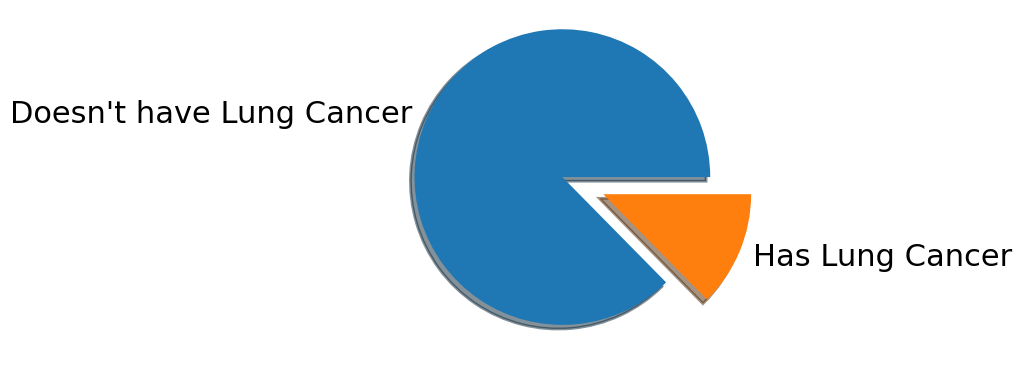

<Figure size 640x480 with 0 Axes>

In [26]:
len_lung_cancer = len(data['LUNG_CANCER'][data.LUNG_CANCER == 1])
len_not_lung_cancer = len(data['LUNG_CANCER'][data.LUNG_CANCER == 0])

arr = np.array([len_lung_cancer, len_not_lung_cancer])
labels = ["Doesn't have Lung Cancer", 'Has Lung Cancer']
print('Total No. of Non-Lung Cancer Cases: ', len_not_lung_cancer)
print('Total No. of Lung Cancer cases: ', len_lung_cancer)

plt.pie(arr, labels = labels, explode=[0.3, 0.0], shadow = True)
plt.show()
plt.savefig("pie1.png")

The Pie Chart helps us to see clearly the ratio of people with lung cancer and people who do not have lung cancer. 


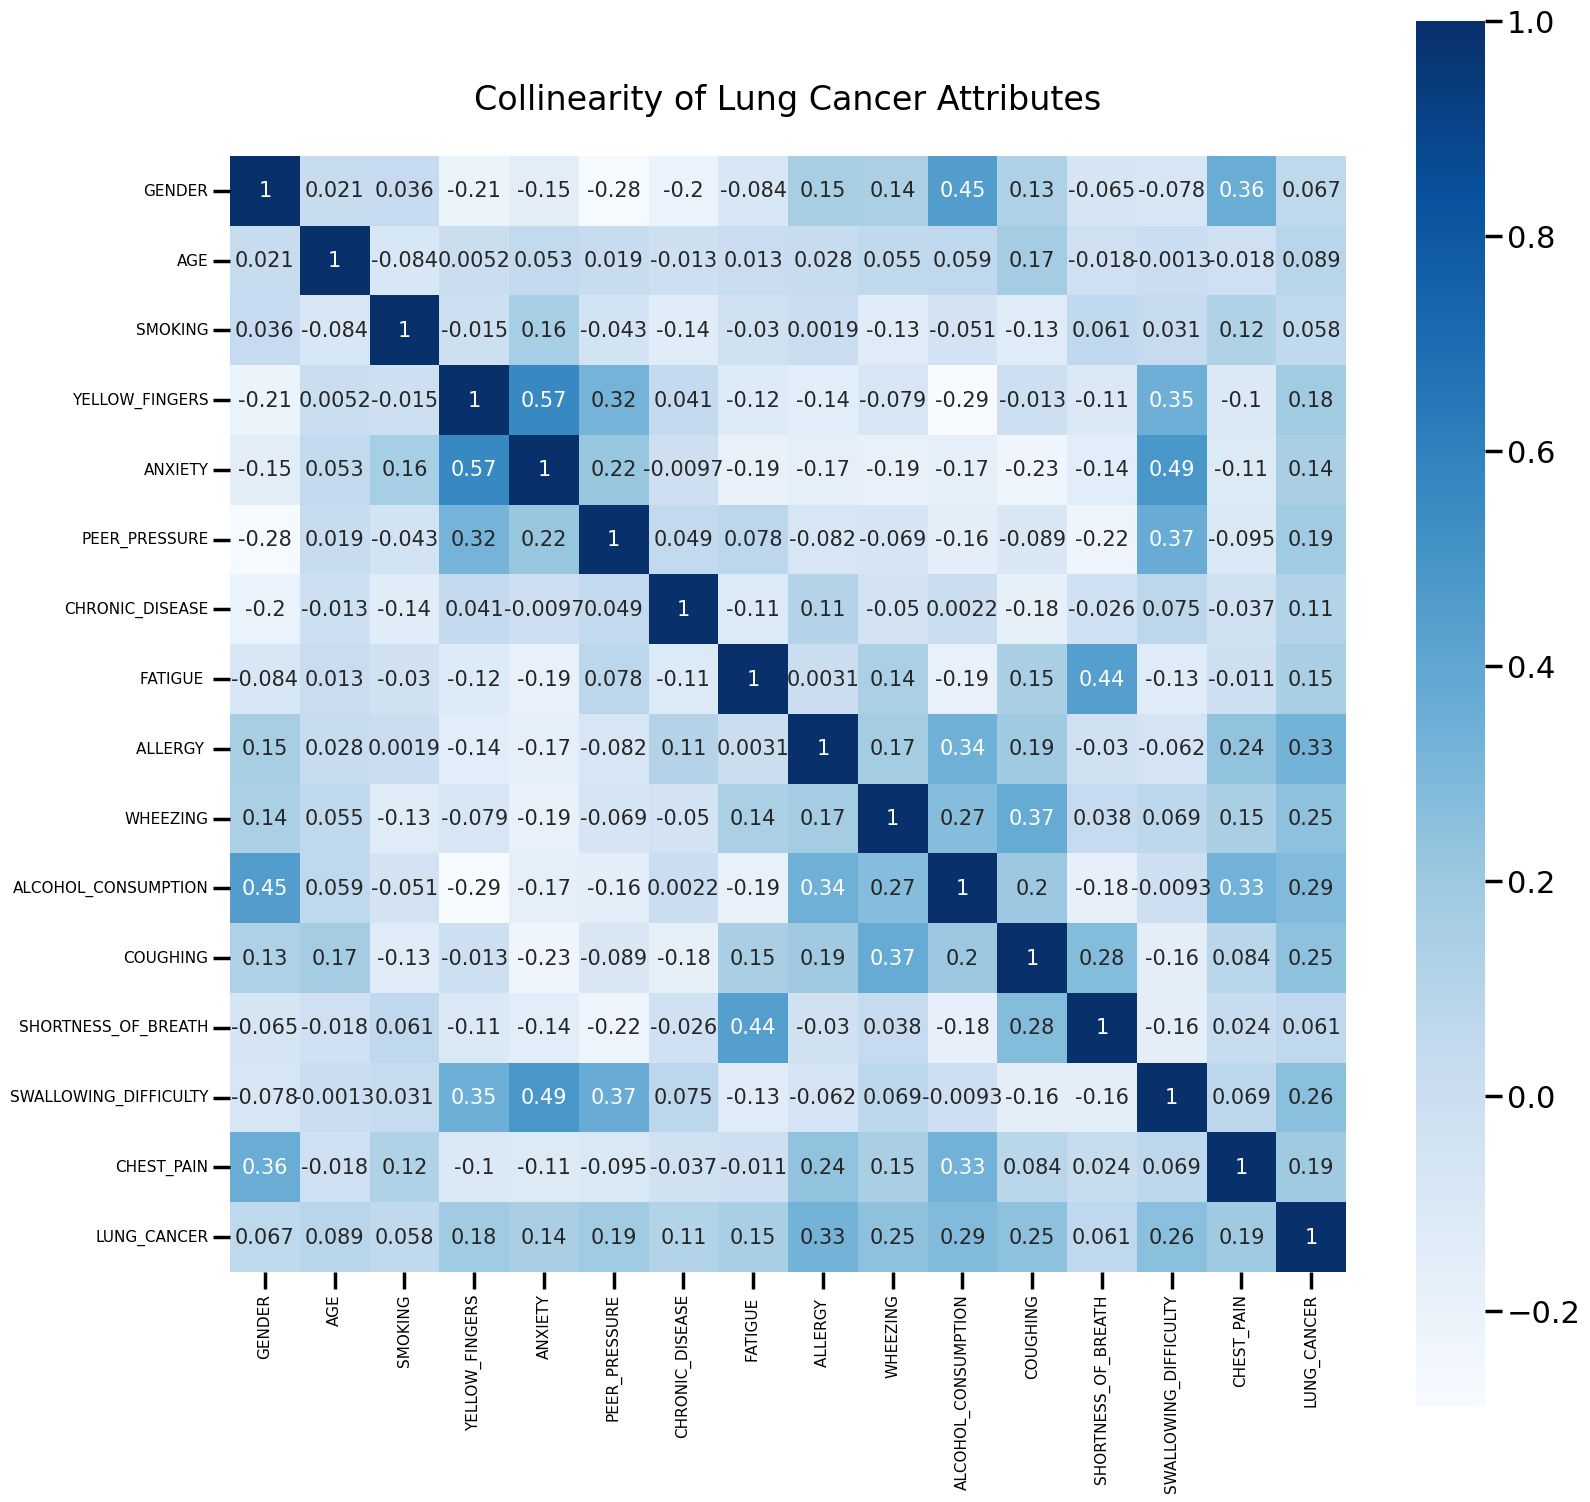

In [39]:
fig, ax = plt.subplots(figsize=(18,18))
sns.set_context('poster')
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='Blues', annot=True, square=True, annot_kws={"size":15})
ax.set_title('Collinearity of Lung Cancer Attributes\n')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=11) 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11) 

plt.savefig('cormap.png')

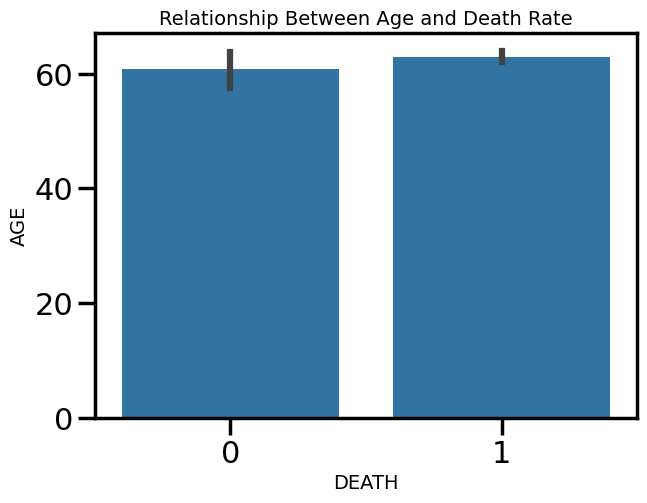

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x =data['LUNG_CANCER'], y = data['AGE'])
plt.xlabel("DEATH",fontsize = 14) 
plt.ylabel("AGE",fontsize = 14)
plt.title("Relationship Between Age and Death Rate", fontsize = 14)
plt.show()
plt.savefig('chart1.png')

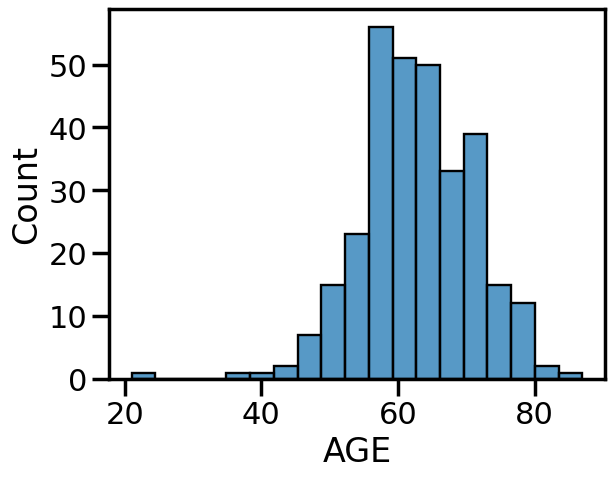

<Figure size 640x480 with 0 Axes>

In [45]:
# age distribution plot
sns.histplot(data['AGE'])
plt.show()
plt.savefig('ageplot.png')

## Splitting the Data

In [64]:
from sklearn.model_selection import train_test_split

X = data.drop("LUNG_CANCER", axis = 1)
y = data.LUNG_CANCER

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (309, 15)
Shape of y:  (309,)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Engineering

In [22]:
def add_interaction(X):
    features = X.columns
    n = len(features)
    X_int = X.copy(deep=True)
    
    for i in range(n):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, n):
            
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
            
    return X_int

x_train_mod = add_interaction(X_train)
x_test_mod = add_interaction(X_test)

What the above function does is that it creates more feature columns by multiplying each column with another column and creates a new column for the product.

In [23]:
x_train_mod.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,...,ALCOHOL_CONSUMPTION_x_COUGHING,ALCOHOL_CONSUMPTION_x_SHORTNESS_OF_BREATH,ALCOHOL_CONSUMPTION_x_SWALLOWING_DIFFICULTY,ALCOHOL_CONSUMPTION_x_CHEST_PAIN,COUGHING_x_SHORTNESS_OF_BREATH,COUGHING_x_SWALLOWING_DIFFICULTY,COUGHING_x_CHEST_PAIN,SHORTNESS_OF_BREATH_x_SWALLOWING_DIFFICULTY,SHORTNESS_OF_BREATH_x_CHEST_PAIN,SWALLOWING_DIFFICULTY_x_CHEST_PAIN
7,0,51,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
45,1,72,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
97,1,59,1,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
92,1,52,1,0,0,0,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
198,0,73,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We can now see that we have 120 columns for the modified training set after applying the function.

## Model Building